In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings 

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

pd.set_option('display.max_columns', None)

In [3]:
# LOAD DATASET
DATA_PATH = '../data/'

orders = pd.read_csv(DATA_PATH + 'olist_orders_dataset.csv')
order_items = pd.read_csv(DATA_PATH + 'olist_order_items_dataset.csv')
customers = pd.read_csv(DATA_PATH + 'olist_customers_dataset.csv')
payments = pd.read_csv(DATA_PATH + 'olist_order_payments_dataset.csv')
reviews = pd.read_csv(DATA_PATH + 'olist_order_reviews_dataset.csv')
products = pd.read_csv(DATA_PATH + 'olist_products_dataset.csv')

In [ ]:
print("="*80)
print('Data info: orders')
print("="*80)

orders.info()

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [5]:
# change date time 

date_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_cols:
    orders[col] = pd.to_datetime(orders[col])


In [8]:
# Only work with delivered orders

orders_delivered = orders[orders['order_status'] == 'delivered'].copy()

In [9]:
orders_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [11]:
print(f"Total delivered orders: {len(orders_delivered)}")

print(f"unique customers: {orders_delivered['customer_id'].nunique()}")

Total delivered orders: 96478
unique customers: 96478


In [13]:
# Analysis reference date
ANALYSIS_DATE = orders_delivered['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
CHURN_THRESHOLD_DAYS = 180

print(f"\nAnalysis Date: {ANALYSIS_DATE}")
print(f"Churn Threshold: {CHURN_THRESHOLD_DAYS} days")


Analysis Date: 2018-08-30 15:00:37
Churn Threshold: 180 days


In [14]:
# =============================================================================
# 2. RFM ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("RFM ANALYSIS")
print("="*80)

# payment merge with Order items
order_value = order_items.groupby('order_id').agg({
    'price': 'sum',
    'freight_value': 'sum'
}).reset_index()

order_value['total_value'] = order_value['price'] + order_value['freight_value']


RFM ANALYSIS


In [15]:
# Orders_delivered merge with order_value
orders_with_value = orders_delivered.merge(
    order_value[['order_id', 'total_value']], 
    on='order_id', 
    how='left'
)

In [17]:
# RFM metrikleri hesapla
rfm = orders_with_value.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (ANALYSIS_DATE - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'total_value': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

print(rfm.head())

print("\nRFM Statistics:")
print(rfm.describe())

                        customer_id  recency  frequency  monetary
0  00012a2ce6f8dcda20d059ce98491703      288          1    114.74
1  000161a058600d5901f007fab4c27140      410          1     67.41
2  0001fd6190edaaf884bcaf3d49edf079      548          1    195.42
3  0002414f95344307404f0ace7a26f1d5      379          1    179.35
4  000379cdec625522490c315e70c7a9fb      150          1    107.01

RFM Statistics:
            recency  frequency      monetary
count  96478.000000    96478.0  96478.000000
mean     240.121364        1.0    159.826839
std      152.836972        0.0    218.794219
min        1.000000        1.0      9.590000
25%      116.000000        1.0     61.850000
50%      221.000000        1.0    105.280000
75%      350.000000        1.0    176.260000
max      714.000000        1.0  13664.080000


In [18]:
# RFM Score hesapla (1-5 arası)
rfm['r_score'] = pd.qcut(rfm['recency'], q=5, labels=[5,4,3,2,1])
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), q=5, labels=[1,2,3,4,5])
rfm['m_score'] = pd.qcut(rfm['monetary'], q=5, labels=[1,2,3,4,5])

# RFM Score birleştir
rfm['rfm_score'] = (rfm['r_score'].astype(str) + 
                    rfm['f_score'].astype(str) + 
                    rfm['m_score'].astype(str))

print(f"\nTop 10 RFM Scores:")
print(rfm['rfm_score'].value_counts().head(10))


Top 10 RFM Scores:
rfm_score
141    875
232    861
212    860
252    858
435    845
524    834
242    833
423    832
424    831
142    823
Name: count, dtype: int64


In [20]:
# =============================================================================
# 3. CUSTOMER SEGMENTATION
# =============================================================================

print("\n" + "="*80)
print("CUSTOMER SEGMENTATION")
print("="*80)

def segment_customers(df):
    """RFM skorlarına göre müşteri segmentasyonu"""
    
    # Convert to int for comparison
    r = int(df['r_score'])
    f = int(df['f_score'])
    m = int(df['m_score'])
    
    if r >= 4 and f >= 4:
        return 'Champions'
    elif r >= 3 and f >= 3:
        return 'Loyal Customers'
    elif r >= 4 and f < 3:
        return 'Potential Loyalists'
    elif r >= 3 and f < 3:
        return 'Promising'
    elif r < 3 and f >= 4:
        return 'At Risk'
    elif r < 3 and f >= 3:
        return 'Need Attention'
    elif r < 2:
        return 'Lost'
    else:
        return 'Others'

rfm['segment'] = rfm.apply(segment_customers, axis=1)

# Segment dağılımı
segment_counts = rfm['segment'].value_counts()
print("\nCustomer Segments:")
print(segment_counts)




CUSTOMER SEGMENTATION

Customer Segments:
segment
Loyal Customers        19245
Potential Loyalists    15606
At Risk                15492
Champions              15396
Need Attention          7754
Others                  7714
Promising               7681
Lost                    7590
Name: count, dtype: int64


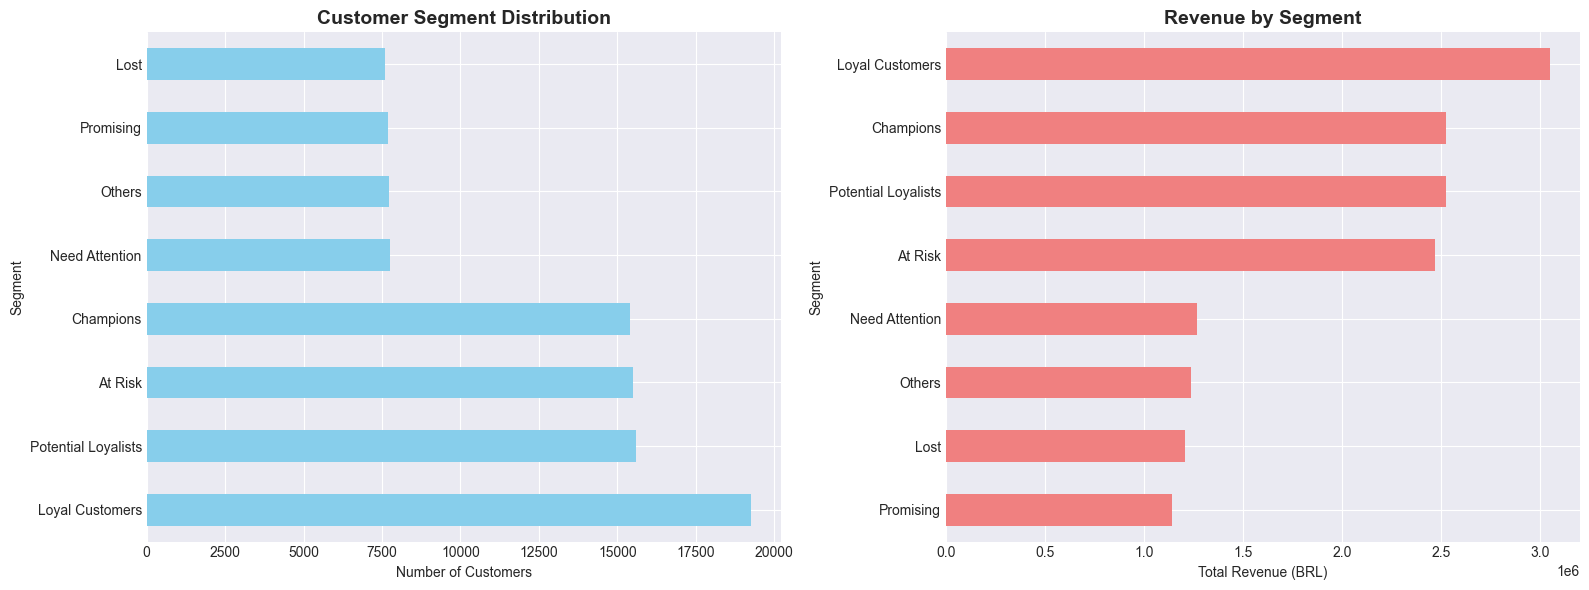

In [21]:
# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Segment distribution
segment_counts.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Customer Segment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Customers')
axes[0].set_ylabel('Segment')

# Segment revenue contribution
segment_revenue = rfm.groupby('segment')['monetary'].sum().sort_values(ascending=True)
segment_revenue.plot(kind='barh', ax=axes[1], color='lightcoral')
axes[1].set_title('Revenue by Segment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Revenue (BRL)')
axes[1].set_ylabel('Segment')

plt.tight_layout()
plt.show()


COHORT ANALYSIS


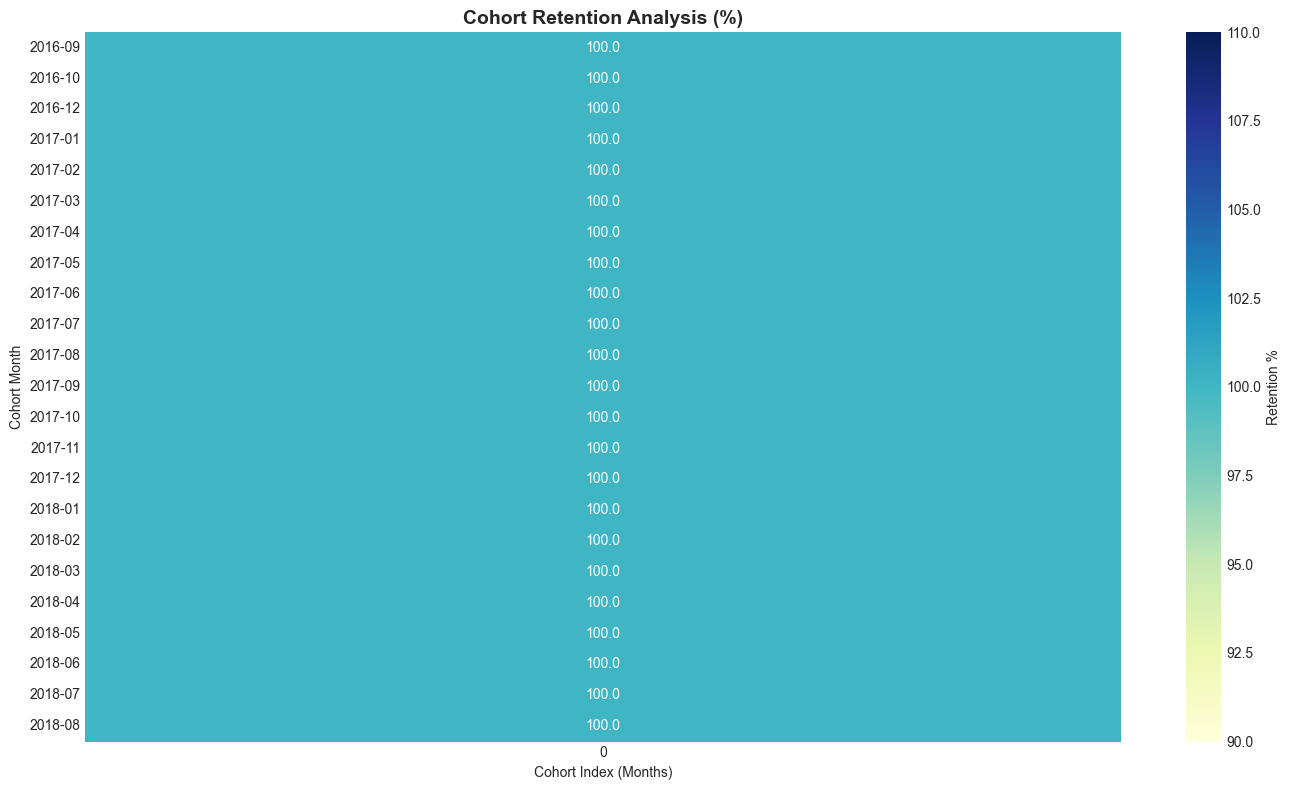

In [22]:
# =============================================================================
# 4. COHORT ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("COHORT ANALYSIS")
print("="*80)

# Her müşterinin ilk sipariş ayını bul (cohort)
customer_cohort = orders_with_value.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
customer_cohort.columns = ['customer_id', 'first_order_date']
customer_cohort['cohort_month'] = customer_cohort['first_order_date'].dt.to_period('M')

# Orders ile merge
orders_cohort = orders_with_value.merge(customer_cohort, on='customer_id')
orders_cohort['order_month'] = orders_cohort['order_purchase_timestamp'].dt.to_period('M')

# Cohort index hesapla (kaç ay sonra sipariş vermiş)
orders_cohort['cohort_index'] = (
    (orders_cohort['order_month'] - orders_cohort['cohort_month']).apply(lambda x: x.n)
)

# Cohort size
cohort_data = orders_cohort.groupby(['cohort_month', 'cohort_index'])['customer_id'].nunique().reset_index()
cohort_data.rename(columns={'customer_id': 'customer_count'}, inplace=True)

# Pivot table oluştur
cohort_pivot = cohort_data.pivot_table(
    index='cohort_month',
    columns='cohort_index',
    values='customer_count'
)

# Retention rate hesapla
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0) * 100

# Görselleştirme
plt.figure(figsize=(14, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Retention %'})
plt.title('Cohort Retention Analysis (%)', fontsize=14, fontweight='bold')
plt.xlabel('Cohort Index (Months)')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()


In [23]:

# =============================================================================
# 5. ADVANCED FEATURE ENGINEERING
# =============================================================================

print("\n" + "="*80)
print("ADVANCED FEATURE ENGINEERING")
print("="*80)

# Master feature dataframe oluştur
features_df = rfm[['customer_id', 'recency', 'frequency', 'monetary']].copy()

# --- Temporal Features ---
customer_timeline = orders_with_value.groupby('customer_id')['order_purchase_timestamp'].agg([
    ('first_order', 'min'),
    ('last_order', 'max')
]).reset_index()

features_df = features_df.merge(customer_timeline, on='customer_id')

# Customer lifetime (gün)
features_df['customer_lifetime_days'] = (
    features_df['last_order'] - features_df['first_order']
).dt.days

# Average days between orders
features_df['avg_days_between_orders'] = np.where(
    features_df['frequency'] > 1,
    features_df['customer_lifetime_days'] / (features_df['frequency'] - 1),
    0
)

# --- Order Value Features ---
order_stats = orders_with_value.groupby('customer_id')['total_value'].agg([
    ('avg_order_value', 'mean'),
    ('min_order_value', 'min'),
    ('max_order_value', 'max'),
    ('std_order_value', 'std')
]).reset_index()

features_df = features_df.merge(order_stats, on='customer_id')

# Fill NaN in std (tek sipariş verenler için)
features_df['std_order_value'].fillna(0, inplace=True)

# --- Payment Behavior ---
payment_stats = payments.merge(
    orders[['order_id', 'customer_id']], 
    on='order_id'
).groupby('customer_id').agg({
    'payment_type': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'credit_card',  # Most used payment
    'payment_installments': 'mean'
}).reset_index()

payment_stats.columns = ['customer_id', 'preferred_payment_type', 'avg_installments']
features_df = features_df.merge(payment_stats, on='customer_id', how='left')

# One-hot encode payment type
payment_dummies = pd.get_dummies(features_df['preferred_payment_type'], prefix='payment')
features_df = pd.concat([features_df, payment_dummies], axis=1)

# --- Review Behavior ---
review_stats = reviews.merge(
    orders[['order_id', 'customer_id']], 
    on='order_id'
).groupby('customer_id')['review_score'].agg([
    ('avg_review_score', 'mean'),
    ('min_review_score', 'min'),
    ('max_review_score', 'max')
]).reset_index()

features_df = features_df.merge(review_stats, on='customer_id', how='left')
features_df[['avg_review_score', 'min_review_score', 'max_review_score']] = \
    features_df[['avg_review_score', 'min_review_score', 'max_review_score']].fillna(3)  # Neutral score

# --- Product Diversity ---
product_diversity = order_items.merge(
    orders[['order_id', 'customer_id']], 
    on='order_id'
).groupby('customer_id')['product_id'].nunique().reset_index()

product_diversity.columns = ['customer_id', 'unique_products_purchased']
features_df = features_df.merge(product_diversity, on='customer_id', how='left')

# --- Delivery Performance ---
delivery_stats = orders_delivered.copy()
delivery_stats['delivery_time'] = (
    delivery_stats['order_delivered_customer_date'] - 
    delivery_stats['order_purchase_timestamp']
).dt.days

delivery_agg = delivery_stats.groupby('customer_id')['delivery_time'].agg([
    ('avg_delivery_time', 'mean'),
    ('max_delivery_time', 'max')
]).reset_index()

features_df = features_df.merge(delivery_agg, on='customer_id', how='left')

# --- RFM Scores ---
features_df = features_df.merge(
    rfm[['customer_id', 'r_score', 'f_score', 'm_score', 'segment']], 
    on='customer_id'
)

# Segment one-hot encoding
segment_dummies = pd.get_dummies(features_df['segment'], prefix='segment')
features_df = pd.concat([features_df, segment_dummies], axis=1)

# --- Target Variable: CHURN ---
features_df['is_churned'] = (features_df['recency'] > CHURN_THRESHOLD_DAYS).astype(int)

print(f"\nTotal features created: {features_df.shape[1]}")
print(f"Churn rate: {features_df['is_churned'].mean()*100:.2f}%")

# Feature summary
print("\nFeature Summary:")
print(features_df.info())



ADVANCED FEATURE ENGINEERING

Total features created: 37
Churn rate: 59.82%

Feature Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96478 entries, 0 to 96477
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  96478 non-null  object        
 1   recency                      96478 non-null  int64         
 2   frequency                    96478 non-null  int64         
 3   monetary                     96478 non-null  float64       
 4   first_order                  96478 non-null  datetime64[ns]
 5   last_order                   96478 non-null  datetime64[ns]
 6   customer_lifetime_days       96478 non-null  int64         
 7   avg_days_between_orders      96478 non-null  float64       
 8   avg_order_value              96478 non-null  float64       
 9   min_order_value              96478 non-null  float64       
 10  max_order_v


CORRELATION ANALYSIS

Top 10 features correlated with churn:
recency                      0.791904
avg_delivery_time            0.140772
max_delivery_time            0.140772
avg_installments             0.029827
unique_products_purchased   -0.001404
monetary                    -0.014522
avg_order_value             -0.014522
min_order_value             -0.014522
max_order_value             -0.014522
max_review_score            -0.027036
Name: is_churned, dtype: float64


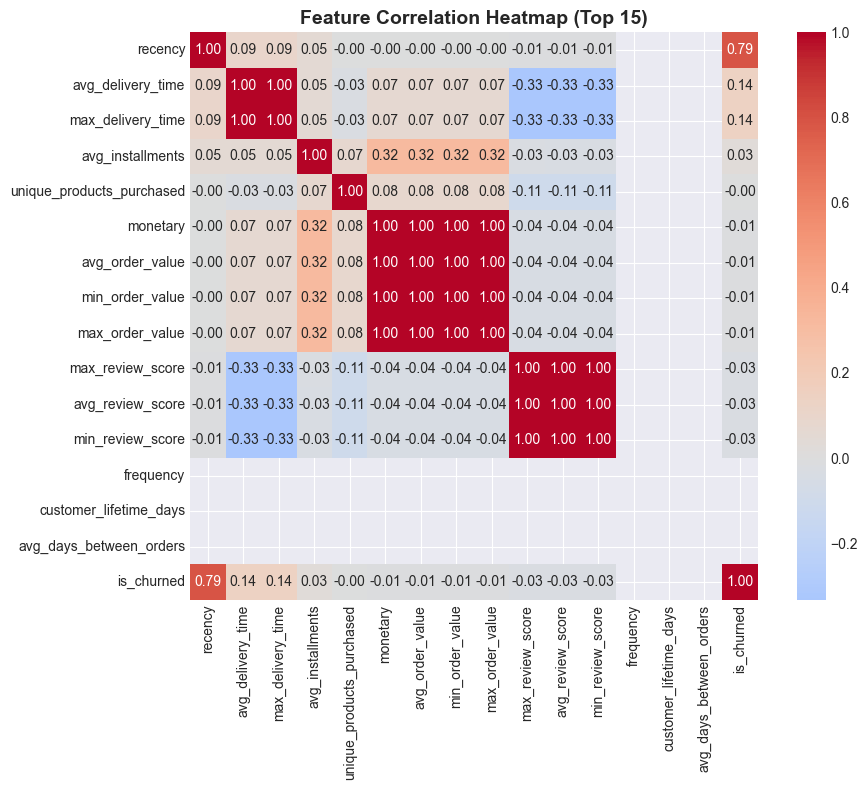

In [26]:
# =============================================================================
# 6. FEATURE IMPORTANCE ANALYSIS (Quick Check)
# =============================================================================

print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Numeric features only
numeric_features = features_df.select_dtypes(include=[np.number]).columns.tolist()

# Remove identifier and target
features_for_corr = [f for f in numeric_features if f not in ['customer_id', 'is_churned']]

# Correlation with target
correlations = features_df[features_for_corr + ['is_churned']].corr()['is_churned'].sort_values(ascending=False)
print("\nTop 10 features correlated with churn:")
print(correlations[1:11])  # Skip self-correlation

# Visualization
plt.figure(figsize=(10, 8))
top_features = correlations[1:16].index  # Top 15
sns.heatmap(
    features_df[list(top_features) + ['is_churned']].corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True
)
plt.title('Feature Correlation Heatmap (Top 15)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [28]:
# =============================================================================
# BONUS: ADVANCED FEATURES (Optional)
# =============================================================================

print("\n" + "="*80)
print("BONUS FEATURES")
print("="*80)

# 1. Category preferences
# Önce order_items'ı orders ile merge et
order_items_with_customer = order_items.merge(
    orders[['order_id', 'customer_id']], 
    on='order_id'
).merge(
    products[['product_id', 'product_category_name']], 
    on='product_id', 
    how='left'
)

# En çok satın alınan kategori
top_category = order_items_with_customer.groupby('customer_id')['product_category_name'].agg(
    lambda x: x.mode()[0] if len(x.mode()) > 0 else 'unknown'
).reset_index()
top_category.columns = ['customer_id', 'top_category']

# Unique kategori sayısı
unique_categories = order_items_with_customer.groupby('customer_id')['product_category_name'].nunique().reset_index()
unique_categories.columns = ['customer_id', 'unique_categories']

# 2. Weekend vs Weekday orders
orders_delivered['is_weekend'] = orders_delivered['order_purchase_timestamp'].dt.dayofweek.isin([5,6]).astype(int)
weekend_stats = orders_delivered.groupby('customer_id').agg({
    'is_weekend': ['mean', 'sum']
}).reset_index()
weekend_stats.columns = ['customer_id', 'weekend_order_ratio', 'total_weekend_orders']

# 3. Order hour preference
orders_delivered['order_hour'] = orders_delivered['order_purchase_timestamp'].dt.hour
hour_stats = orders_delivered.groupby('customer_id')['order_hour'].agg(['mean', 'std']).reset_index()
hour_stats.columns = ['customer_id', 'avg_order_hour', 'std_order_hour']
hour_stats['std_order_hour'].fillna(0, inplace=True)

# 4. Order time of day (morning/afternoon/evening/night)
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 22:
        return 'evening'
    else:
        return 'night'

orders_delivered['time_of_day'] = orders_delivered['order_hour'].apply(categorize_time)
time_preference = orders_delivered.groupby('customer_id')['time_of_day'].agg(
    lambda x: x.mode()[0] if len(x.mode()) > 0 else 'afternoon'
).reset_index()
time_preference.columns = ['customer_id', 'preferred_time_of_day']

# Merge all bonus features
features_df = features_df.merge(top_category, on='customer_id', how='left')
features_df = features_df.merge(unique_categories, on='customer_id', how='left')
features_df = features_df.merge(weekend_stats, on='customer_id', how='left')
features_df = features_df.merge(hour_stats, on='customer_id', how='left')
features_df = features_df.merge(time_preference, on='customer_id', how='left')

# One-hot encode categorical bonus features
time_dummies = pd.get_dummies(features_df['preferred_time_of_day'], prefix='time')
features_df = pd.concat([features_df, time_dummies], axis=1)

print(f"\n✅ Bonus features added!")
print(f"New total features: {features_df.shape[1]}")
print("\nBonus feature summary:")
print(features_df[['unique_categories', 'weekend_order_ratio', 'avg_order_hour']].describe())


BONUS FEATURES

✅ Bonus features added!
New total features: 48

Bonus feature summary:
       unique_categories  weekend_order_ratio  avg_order_hour
count       96478.000000         96478.000000    96478.000000
mean            0.993843             0.230001       14.773192
std             0.147407             0.420835        5.328374
min             0.000000             0.000000        0.000000
25%             1.000000             0.000000       11.000000
50%             1.000000             0.000000       15.000000
75%             1.000000             0.000000       19.000000
max             3.000000             1.000000       23.000000


In [25]:
# =============================================================================
# 7. VERİYİ KAYDET
# =============================================================================

# Processed data klasörüne kaydet
output_path = '../data/processed/'
features_df.to_csv(output_path + 'customer_features.csv', index=False)

print(f"\n✅ Features saved to {output_path}customer_features.csv")
print(f"Total customers: {len(features_df)}")
print(f"Total features: {features_df.shape[1]}")
print(f"Churned customers: {features_df['is_churned'].sum()}")

# Feature list'i kaydet
feature_list = [col for col in features_df.columns if col not in ['customer_id', 'first_order', 'last_order', 'preferred_payment_type', 'segment', 'is_churned']]

with open(output_path + 'feature_list.txt', 'w') as f:
    for feature in feature_list:
        f.write(f"{feature}\n")

print(f"\n✅ Feature list saved to {output_path}feature_list.txt")
print("\n🎯 Ready for modeling!")


✅ Features saved to ../data/processed/customer_features.csv
Total customers: 96478
Total features: 37
Churned customers: 57714

✅ Feature list saved to ../data/processed/feature_list.txt

🎯 Ready for modeling!


In [30]:
# =============================================================================
# BONUS FEATURES - ADVANCED CUSTOMER BEHAVIOR ANALYSIS
# =============================================================================
"""
Bu bölümde müşteri davranışlarını daha derinlemesine analiz eden 
ek feature'lar oluşturacağız:

1. Ürün Kategorisi Tercihleri (Category Preferences)
2. Hafta Sonu vs Hafta İçi Alışveriş Davranışı (Weekend Shopping)
3. Sipariş Saati Tercihleri (Order Hour Patterns)
4. Günün Hangi Vakti Sipariş Veriliyor (Time of Day Preference)

Bu feature'lar müşterinin alışveriş alışkanlıklarını ve yaşam tarzını
yansıtır, bu da churn prediction için değerli bilgiler sağlar.
"""

print("\n" + "="*80)
print("BONUS FEATURES - ADVANCED BEHAVIOR ANALYSIS")
print("="*80)

# =============================================================================
# 1. ÜRÜN KATEGORİSİ TERCİHLERİ (CATEGORY PREFERENCES)
# =============================================================================
"""
Amaç: Her müşterinin hangi ürün kategorilerinden alışveriş yaptığını öğrenmek

Neden önemli?
- Belirli kategorilere sadık müşteriler daha az churn edebilir
- Kategori çeşitliliği müşteri bağlılığını gösterebilir
- E-commerce'te kategori bazlı segmentasyon çok yaygındır
"""

print("\n1. Product Category Preferences...")

# Adım 1: order_items tablosunu orders ile birleştir
# Çünkü order_items'da customer_id yok, sadece order_id var
order_items_with_customer = order_items.merge(
    orders[['order_id', 'customer_id']],  # orders'dan sadece gerekli kolonlar
    on='order_id',                         # ortak kolon: order_id
    how='left'                             # tüm order_items'ı koru
)

# Adım 2: Ürün bilgilerini ekle (products tablosundan)
order_items_with_customer = order_items_with_customer.merge(
    products[['product_id', 'product_category_name']],  # ürün ve kategori bilgisi
    on='product_id',                                     # ortak kolon: product_id
    how='left'                                           # tüm order_items'ı koru
)

print(f"   - Merged dataset shape: {order_items_with_customer.shape}")

# Adım 3: Her müşteri için EN ÇOK satın alınan kategoriyi bul
# mode() = en sık tekrar eden değer (moda)
top_category = order_items_with_customer.groupby('customer_id')['product_category_name'].agg(
    lambda x: x.mode()[0] if len(x.mode()) > 0 else 'unknown'  # mode yoksa 'unknown'
).reset_index()
top_category.columns = ['customer_id', 'top_category']  # kolon isimlerini düzenle

print(f"   - Top categories found for {len(top_category)} customers")
print(f"   - Most popular category: {top_category['top_category'].mode()[0]}")

# Adım 4: Her müşterinin kaç FARKLI kategoriden alışveriş yaptığını say
# Kategori çeşitliliği = müşterinin platformu keşfetme derecesi
unique_categories = order_items_with_customer.groupby('customer_id')['product_category_name'].nunique().reset_index()
unique_categories.columns = ['customer_id', 'unique_categories']

print(f"   - Average categories per customer: {unique_categories['unique_categories'].mean():.2f}")

# =============================================================================
# 2. HAFTA SONU vs HAFTA İÇİ ALIŞVERİŞ DAVRANIŞI
# =============================================================================
"""
Amaç: Müşterilerin hafta sonu mu yoksa hafta içi mi alışveriş yaptığını analiz etmek

Neden önemli?
- Hafta sonu alışveriş yapanlar boş zamanlarını e-commerce'e ayırıyor (daha engaged)
- Hafta içi alışveriş yapanlar acil ihtiyaçlar için kullanıyor olabilir
- Alışveriş zamanlaması yaşam tarzını ve bağlılığı gösterir
"""

print("\n2. Weekend vs Weekday Shopping Behavior...")

# Adım 1: Haftanın hangi günü olduğunu bul
# dt.dayofweek: 0=Monday, 1=Tuesday, ..., 5=Saturday, 6=Sunday
orders_delivered['is_weekend'] = orders_delivered['order_purchase_timestamp'].dt.dayofweek.isin([5,6]).astype(int)
# isin([5,6]): Cumartesi (5) veya Pazar (6) ise True
# astype(int): True->1, False->0

# Adım 2: Her müşteri için hafta sonu istatistikleri hesapla
weekend_stats = orders_delivered.groupby('customer_id').agg({
    'is_weekend': ['mean', 'sum']  # mean: hafta sonu oranı, sum: toplam hafta sonu sipariş
}).reset_index()

# Multi-level column names'i düzelt
weekend_stats.columns = ['customer_id', 'weekend_order_ratio', 'total_weekend_orders']
# weekend_order_ratio: 0.0 (hiç hafta sonu yok) - 1.0 (hep hafta sonu)

print(f"   - Average weekend order ratio: {weekend_stats['weekend_order_ratio'].mean():.2%}")
print(f"   - Customers who ONLY order on weekends: {(weekend_stats['weekend_order_ratio']==1).sum()}")

# =============================================================================
# 3. SİPARİŞ SAATİ TERCİHLERİ (ORDER HOUR PATTERNS)
# =============================================================================
"""
Amaç: Müşterilerin genellikle günün hangi saatlerinde sipariş verdiğini bulmak

Neden önemli?
- Gece sipariş verenler farklı demografik olabilir (gençler, insomnia)
- Öğle saatlerinde sipariş verenler ofiste çalışan olabilir
- Sipariş saati düzeni müşterinin rutin alışkanlıklarını gösterir
"""

print("\n3. Order Hour Preferences...")

# Adım 1: Sipariş saatini çıkar (0-23 arası)
orders_delivered['order_hour'] = orders_delivered['order_purchase_timestamp'].dt.hour
# dt.hour: datetime'dan sadece saat bilgisini alır (örn: 14:30:45 -> 14)

# Adım 2: Her müşteri için ortalama sipariş saati ve standart sapma
hour_stats = orders_delivered.groupby('customer_id')['order_hour'].agg([
    'mean',  # ortalama saat: müşteri genelde saat kaçta sipariş veriyor?
    'std'    # standart sapma: sipariş saatleri ne kadar değişken?
]).reset_index()

hour_stats.columns = ['customer_id', 'avg_order_hour', 'std_order_hour']

# std_order_hour NaN olabilir (tek sipariş verenler için)
# Yüksek std = düzensiz sipariş saatleri, düşük std = düzenli rutinler
hour_stats['std_order_hour'].fillna(0, inplace=True)

print(f"   - Average order hour across all customers: {hour_stats['avg_order_hour'].mean():.1f}")
print(f"   - Peak order hour: {orders_delivered['order_hour'].mode()[0]}:00")

# =============================================================================
# 4. GÜNÜN HANGİ VAKTİ (TIME OF DAY CATEGORIZATION)
# =============================================================================
"""
Amaç: Sipariş saatlerini anlamlı zaman dilimlerine ayırmak

Time zones:
- Morning (06:00-12:00): Sabah erken alışveriş yapanlar
- Afternoon (12:00-18:00): Öğlen/öğleden sonra
- Evening (18:00-22:00): Akşam, iş sonrası
- Night (22:00-06:00): Gece kuşları

Neden önemli?
- Kategorik feature modelleme için daha anlamlı olabilir
- Pazarlama kampanyaları için segmentasyon yapmaya yardımcı
"""

print("\n4. Time of Day Categorization...")

# Adım 1: Saati kategori haline getiren fonksiyon
def categorize_time(hour):
    """
    Sipariş saatini günün vaktine göre kategorize eder
    
    Parameters:
    -----------
    hour : int
        Sipariş saati (0-23)
    
    Returns:
    --------
    str : 'morning', 'afternoon', 'evening', veya 'night'
    """
    if 6 <= hour < 12:
        return 'morning'      # 06:00 - 11:59
    elif 12 <= hour < 18:
        return 'afternoon'    # 12:00 - 17:59
    elif 18 <= hour < 22:
        return 'evening'      # 18:00 - 21:59
    else:
        return 'night'        # 22:00 - 05:59

# Adım 2: Her siparişi kategorize et
orders_delivered['time_of_day'] = orders_delivered['order_hour'].apply(categorize_time)

# Adım 3: Her müşteri için EN SIK sipariş verdiği zaman dilimini bul
time_preference = orders_delivered.groupby('customer_id')['time_of_day'].agg(
    lambda x: x.mode()[0] if len(x.mode()) > 0 else 'afternoon'  # default: afternoon
).reset_index()
time_preference.columns = ['customer_id', 'preferred_time_of_day']

# Dağılımı göster
print("\n   Time of Day Distribution:")
print(time_preference['preferred_time_of_day'].value_counts())

# DEBUG: Kontrol et
print(f"\n   DEBUG: time_preference shape: {time_preference.shape}")
print(f"   DEBUG: time_preference columns: {time_preference.columns.tolist()}")

# =============================================================================
# 5. TÜM BONUS FEATURE'LARI ANA DATAFRAME'E EKLE
# =============================================================================
"""
Şimdi oluşturduğumuz tüm bonus feature'ları ana features_df'e merge edeceğiz.
Her merge işlemi 'customer_id' üzerinden yapılır.
"""

print("\n5. Merging all bonus features...")

# features_df zaten mevcut ana dataframe'imiz
# Her merge'de how='left' kullanıyoruz: ana df'deki tüm müşterileri koruyoruz

# Kategori tercihleri ekle
features_df = features_df.merge(top_category, on='customer_id', how='left')
print(f"   ✓ Top category added")

features_df = features_df.merge(unique_categories, on='customer_id', how='left')
print(f"   ✓ Unique categories count added")

# Hafta sonu istatistikleri ekle
features_df = features_df.merge(weekend_stats, on='customer_id', how='left')
print(f"   ✓ Weekend shopping stats added")

# Sipariş saati istatistikleri ekle
features_df = features_df.merge(hour_stats, on='customer_id', how='left')
print(f"   ✓ Order hour stats added")

# Günün vakti tercihi ekle
features_df = features_df.merge(time_preference, on='customer_id', how='left')
print(f"   ✓ Time of day preference added")

# DEBUG: Merge sonrası kontrol
print(f"\n   DEBUG: features_df shape after time merge: {features_df.shape}")
print(f"   DEBUG: 'preferred_time_of_day' in columns: {'preferred_time_of_day' in features_df.columns}")
if 'preferred_time_of_day' in features_df.columns:
    print(f"   DEBUG: preferred_time_of_day null count: {features_df['preferred_time_of_day'].isnull().sum()}")
else:
    print("   ⚠️  WARNING: 'preferred_time_of_day' column not found after merge!")
    print(f"   Available columns: {features_df.columns.tolist()}")

# =============================================================================
# 6. KATEGORİK FEATURE'LARI ONE-HOT ENCODE ET
# =============================================================================
"""
Machine Learning modelleri kategorik verileri anlayamaz (text).
One-hot encoding ile kategorileri binary (0/1) kolonlara çeviriyoruz.

Örnek:
preferred_time_of_day = 'morning' 
→ time_morning=1, time_afternoon=0, time_evening=0, time_night=0
"""

print("\n6. One-hot encoding categorical features...")

# Önce kolonun varlığını kontrol et
if 'preferred_time_of_day' in features_df.columns:
    # 'preferred_time_of_day' kolonunu one-hot encode et
    # prefix='time': yeni kolonlar 'time_morning', 'time_afternoon', vs. olacak
    time_dummies = pd.get_dummies(features_df['preferred_time_of_day'], prefix='time')
    print(f"   ✓ Created {len(time_dummies.columns)} time-based binary features: {time_dummies.columns.tolist()}")
    
    # Ana dataframe'e ekle
    features_df = pd.concat([features_df, time_dummies], axis=1)
    # axis=1: kolonlar olarak ekle (axis=0 satır ekler)
else:
    print("   ⚠️  Skipping one-hot encoding: 'preferred_time_of_day' column not found")
    print("   This might happen if time_preference merge failed")
    
    # Alternatif: Manuel olarak ekleyelim
    print("\n   Attempting manual fix...")
    
    # time_preference'ı tekrar kontrol et
    if 'time_preference' in dir():
        print(f"   time_preference exists with shape: {time_preference.shape}")
        
        # Tekrar merge dene
        features_df = features_df.merge(
            time_preference[['customer_id', 'preferred_time_of_day']], 
            on='customer_id', 
            how='left',
            suffixes=('', '_new')
        )
        
        # Eğer '_new' suffix ile gelirse düzelt
        if 'preferred_time_of_day_new' in features_df.columns:
            features_df['preferred_time_of_day'] = features_df['preferred_time_of_day_new']
            features_df.drop('preferred_time_of_day_new', axis=1, inplace=True)
        
        # Şimdi one-hot encode yap
        if 'preferred_time_of_day' in features_df.columns:
            time_dummies = pd.get_dummies(features_df['preferred_time_of_day'], prefix='time')
            features_df = pd.concat([features_df, time_dummies], axis=1)
            print(f"   ✓ Manual fix successful! Created {len(time_dummies.columns)} features")
    else:
        print("   ❌ Could not fix: time_preference variable not found")

# =============================================================================
# 7. BONUS FEATURE'LAR HAKKINDA İSTATİSTİKLER
# =============================================================================
"""
Oluşturduğumuz feature'ların kalitesini kontrol edelim
"""

print("\n" + "="*80)
print("BONUS FEATURES SUMMARY")
print("="*80)

print(f"\n✅ Total features after bonus: {features_df.shape[1]}")

# Numeric bonus features'ların istatistikleri
bonus_numeric = ['unique_categories', 'weekend_order_ratio', 'avg_order_hour', 
                 'std_order_hour', 'total_weekend_orders']

print("\nNumeric Bonus Features Statistics:")
print(features_df[bonus_numeric].describe())

# Kategorik feature dağılımları
print("\n\nTop 5 Most Popular Product Categories:")
print(features_df['top_category'].value_counts().head())

print("\n\nPreferred Time of Day Distribution:")
print(features_df['preferred_time_of_day'].value_counts())

# Correlation with churn - yeni feature'lar ne kadar predictive?
print("\n\nBonus Features Correlation with Churn:")
bonus_correlations = features_df[bonus_numeric + ['is_churned']].corr()['is_churned'].sort_values(ascending=False)
print(bonus_correlations)

# =============================================================================
# 8. MISSING VALUES KONTROLÜ
# =============================================================================
"""
Merge işlemleri sonrası bazı müşteriler için veri eksik olabilir.
Kontrol edip gerekirse doldurmalıyız.
"""

print("\n" + "="*80)
print("DATA QUALITY CHECK")
print("="*80)

# Missing values var mı?
missing_counts = features_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

if len(missing_counts) > 0:
    print("\n⚠️  Missing values detected:")
    print(missing_counts)
    
    # Örnek: top_category NaN ise 'unknown' ile doldur
    if 'top_category' in missing_counts:
        features_df['top_category'].fillna('unknown', inplace=True)
        print("   ✓ Filled 'top_category' missing values with 'unknown'")
    
    # Numeric kolonlar için 0 veya median ile doldur
    numeric_cols_with_na = features_df.select_dtypes(include=[np.number]).columns
    numeric_cols_with_na = [col for col in numeric_cols_with_na if features_df[col].isnull().any()]
    
    for col in numeric_cols_with_na:
        features_df[col].fillna(features_df[col].median(), inplace=True)
        print(f"   ✓ Filled '{col}' missing values with median")
else:
    print("\n✅ No missing values detected!")

print("\n🎉 Bonus features successfully added!")
print(f"Final dataset shape: {features_df.shape}")
print(f"Ready for modeling with {features_df.shape[1]} total features!")


BONUS FEATURES - ADVANCED BEHAVIOR ANALYSIS

1. Product Category Preferences...
   - Merged dataset shape: (112650, 9)
   - Top categories found for 98666 customers
   - Most popular category: cama_mesa_banho
   - Average categories per customer: 0.99

2. Weekend vs Weekday Shopping Behavior...
   - Average weekend order ratio: 23.00%
   - Customers who ONLY order on weekends: 22190

3. Order Hour Preferences...
   - Average order hour across all customers: 14.8
   - Peak order hour: 16:00

4. Time of Day Categorization...

   Time of Day Distribution:
preferred_time_of_day
afternoon    37183
evening      23433
morning      21594
night        14268
Name: count, dtype: int64

   DEBUG: time_preference shape: (96478, 2)
   DEBUG: time_preference columns: ['customer_id', 'preferred_time_of_day']

5. Merging all bonus features...
   ✓ Top category added
   ✓ Unique categories count added
   ✓ Weekend shopping stats added
   ✓ Order hour stats added
   ✓ Time of day preference added

   DE

In [31]:
# =============================================================================
# FINAL DATA QUALITY CHECKS & SAVE
# =============================================================================
"""
Modellemeden önce son kontroller:
1. Data types doğru mu?
2. Infinite values var mı?
3. Feature list hazır mı?
4. Train/test split için hazır mı?
"""

print("\n" + "="*80)
print("FINAL DATA QUALITY CHECKS")
print("="*80)

# -----------------------------------------------------------------------------
# 1. DATA TYPES KONTROLÜ
# -----------------------------------------------------------------------------
print("\n1. Checking data types...")

# Kategorik kolonlar (one-hot encode edilmemiş olanlar)
categorical_cols = features_df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"   Categorical columns: {categorical_cols}")

# Boolean kolonlar
bool_cols = features_df.select_dtypes(include=['bool']).columns.tolist()
print(f"   Boolean columns ({len(bool_cols)} total)")

# Numeric kolonlar
numeric_cols = features_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"   Numeric columns ({len(numeric_cols)} total)")

# -----------------------------------------------------------------------------
# 2. INFINITE VALUES KONTROLÜ
# -----------------------------------------------------------------------------
print("\n2. Checking for infinite values...")

# Sadece numeric kolonlarda inf olabilir
inf_check = features_df[numeric_cols].isin([np.inf, -np.inf]).sum()
inf_check = inf_check[inf_check > 0]

if len(inf_check) > 0:
    print(f"   ⚠️  Infinite values found:")
    print(inf_check)
    
    # Inf değerleri NaN ile değiştir, sonra median ile doldur
    for col in inf_check.index:
        features_df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        features_df[col].fillna(features_df[col].median(), inplace=True)
    print("   ✓ Infinite values replaced with median")
else:
    print("   ✅ No infinite values detected")

# -----------------------------------------------------------------------------
# 3. FINAL MISSING VALUES CHECK
# -----------------------------------------------------------------------------
print("\n3. Final missing values check...")

final_missing = features_df.isnull().sum()
final_missing = final_missing[final_missing > 0]

if len(final_missing) > 0:
    print(f"   ⚠️  Missing values still present:")
    print(final_missing)
    
    # Kategorik için 'unknown', numeric için median
    for col in final_missing.index:
        if col in categorical_cols:
            features_df[col].fillna('unknown', inplace=True)
            print(f"   ✓ Filled '{col}' with 'unknown'")
        else:
            features_df[col].fillna(features_df[col].median(), inplace=True)
            print(f"   ✓ Filled '{col}' with median")
else:
    print("   ✅ No missing values!")

# -----------------------------------------------------------------------------
# 4. FEATURE LIST HAZIRLIĞI
# -----------------------------------------------------------------------------
print("\n4. Preparing feature list for modeling...")

# Modeling'de kullanılmayacak kolonlar
exclude_from_modeling = [
    'customer_id',           # identifier
    'first_order',           # datetime
    'last_order',            # datetime
    'is_churned',            # target variable
    'preferred_payment_type', # text (one-hot encoded versiyonunu kullanacağız)
    'segment',               # text (one-hot encoded versiyonunu kullanacağız)
    'top_category',          # text (çok fazla unique value, one-hot yapmadık)
    'preferred_time_of_day', # text (one-hot encoded versiyonunu kullanacağız)
    'r_score',               # categorical (ordinal ama numeric feature'lar zaten var)
    'f_score',               # categorical
    'm_score'                # categorical
]

# Model için kullanılacak feature'lar
modeling_features = [col for col in features_df.columns if col not in exclude_from_modeling]

print(f"   Total columns: {len(features_df.columns)}")
print(f"   Excluded columns: {len(exclude_from_modeling)}")
print(f"   Features for modeling: {len(modeling_features)}")

# Feature types breakdown
feature_types = {
    'RFM': ['recency', 'frequency', 'monetary'],
    'Temporal': ['customer_lifetime_days', 'avg_days_between_orders'],
    'Order Value': ['avg_order_value', 'min_order_value', 'max_order_value', 'std_order_value'],
    'Payment': [col for col in modeling_features if 'payment' in col],
    'Review': ['avg_review_score', 'min_review_score', 'max_review_score'],
    'Product': ['unique_products_purchased', 'unique_categories'],
    'Delivery': ['avg_delivery_time', 'max_delivery_time'],
    'Segment': [col for col in modeling_features if 'segment_' in col],
    'Time': [col for col in modeling_features if 'time_' in col or 'weekend' in col or 'hour' in col]
}

print("\n   Feature breakdown by category:")
for category, feats in feature_types.items():
    actual_feats = [f for f in feats if f in modeling_features]
    print(f"   - {category}: {len(actual_feats)} features")

# -----------------------------------------------------------------------------
# 5. DISTRIBUTION CHECKS
# -----------------------------------------------------------------------------
print("\n5. Checking target variable distribution...")

churn_dist = features_df['is_churned'].value_counts(normalize=True)
print(f"   Active customers: {churn_dist[0]:.2%}")
print(f"   Churned customers: {churn_dist[1]:.2%}")

# Class imbalance check
imbalance_ratio = churn_dist[1] / churn_dist[0]
if imbalance_ratio < 0.5 or imbalance_ratio > 2:
    print(f"   ⚠️  Class imbalance detected (ratio: {imbalance_ratio:.2f})")
    print("   → Will need SMOTE or class_weight in modeling")
else:
    print(f"   ✅ Classes relatively balanced (ratio: {imbalance_ratio:.2f})")

# -----------------------------------------------------------------------------
# 6. SAVE FILES
# -----------------------------------------------------------------------------
print("\n6. Saving processed data...")

output_path = '../data/processed/'

# Main feature file
features_df.to_csv(output_path + 'customer_features_final.csv', index=False)
print(f"   ✓ Saved: customer_features_final.csv ({features_df.shape})")

# Modeling-ready features (without excluded columns)
features_for_model = features_df[['customer_id'] + modeling_features + ['is_churned']]
features_for_model.to_csv(output_path + 'features_for_modeling.csv', index=False)
print(f"   ✓ Saved: features_for_modeling.csv ({features_for_model.shape})")

# Feature list
with open(output_path + 'feature_list.txt', 'w') as f:
    for feature in modeling_features:
        f.write(f"{feature}\n")
print(f"   ✓ Saved: feature_list.txt ({len(modeling_features)} features)")

# Feature metadata (JSON for easy loading)
import json

feature_metadata = {
    'total_features': len(modeling_features),
    'total_customers': len(features_df),
    'churn_rate': float(features_df['is_churned'].mean()),
    'feature_categories': {k: len([f for f in v if f in modeling_features]) 
                          for k, v in feature_types.items()},
    'excluded_columns': exclude_from_modeling,
    'date_created': str(pd.Timestamp.now())
}

with open(output_path + 'feature_metadata.json', 'w') as f:
    json.dump(feature_metadata, f, indent=2)
print(f"   ✓ Saved: feature_metadata.json")

# -----------------------------------------------------------------------------
# 7. SUMMARY STATISTICS
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("FINAL DATASET SUMMARY")
print("="*80)

print(f"\n📊 Dataset Statistics:")
print(f"   - Total Customers: {len(features_df):,}")
print(f"   - Total Features: {len(modeling_features)}")
print(f"   - Churned Customers: {features_df['is_churned'].sum():,} ({features_df['is_churned'].mean():.2%})")
print(f"   - Active Customers: {(~features_df['is_churned'].astype(bool)).sum():,} ({(1-features_df['is_churned'].mean()):.2%})")

print(f"\n📈 Feature Statistics:")
print(f"   - Numeric Features: {len([f for f in modeling_features if f in numeric_cols])}")
print(f"   - Binary Features: {len([f for f in modeling_features if f in bool_cols])}")
print(f"   - Missing Values: {features_df[modeling_features].isnull().sum().sum()}")

print(f"\n💾 Saved Files:")
print(f"   - customer_features_final.csv")
print(f"   - features_for_modeling.csv")
print(f"   - feature_list.txt")
print(f"   - feature_metadata.json")

print("\n" + "="*80)
print("🎉 FEATURE ENGINEERING COMPLETE!")
print("="*80)
print("\n✅ Ready for modeling!")
print("📁 All files saved to: ../data/processed/")
print("\n🚀 Next step: Notebook 3 - Model Training & Evaluation")


FINAL DATA QUALITY CHECKS

1. Checking data types...
   Categorical columns: ['customer_id', 'preferred_payment_type', 'r_score', 'f_score', 'm_score', 'segment', 'top_category_x', 'preferred_time_of_day_x', 'top_category_y', 'preferred_time_of_day_y', 'top_category', 'preferred_time_of_day']
   Boolean columns (20 total)
   Numeric columns (32 total)

2. Checking for infinite values...
   ✅ No infinite values detected

3. Final missing values check...
   ⚠️  Missing values still present:
preferred_payment_type    1
dtype: int64
   ✓ Filled 'preferred_payment_type' with 'unknown'

4. Preparing feature list for modeling...
   Total columns: 66
   Excluded columns: 11
   Features for modeling: 55

   Feature breakdown by category:
   - RFM: 3 features
   - Temporal: 2 features
   - Order Value: 4 features
   - Payment: 4 features
   - Review: 3 features
   - Product: 2 features
   - Delivery: 2 features
   - Segment: 8 features
   - Time: 23 features

5. Checking target variable distrib